In [81]:
import os

from google.cloud import bigquery

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]=r"PATH_to_your_big_query_key.json"

# or with setting an environment variable:
# export GOOGLE_APPLICATION_CREDENTIALS="PATH_to_your_big_query_key.json"

In [82]:
class Chicago_Taxi_Trips:
    """
    Class to pull data from the Chicago Taxi Trips dataset
    
    Short information about this dataset:
    
    Chicago taxi trips from 2013 to present
    
    The dataset has 70.4 GB
    
    """
    
    def __init__(self):
        """

        Init function contructing the client and authenticating
        with credentials set in the environment
        and performing the SQL query pulling all  from the dataset

        """

        self.client = bigquery.Client()

    
    def taxi_trips_all_data(self):
        
        self.query = """
        SELECT
              *
          FROM
            `bigquery-public-data.chicago_taxi_trips.taxi_trips`
            LIMIT 100
         """
        self.query_job = self.client.query(self.query)
        self.results = self.query_job.result()
        return self.results.to_dataframe()
        
    
    
    def highest_average_tips(self):
        
        self.highest_tips_query = """
        SELECT
            dropoff_community_area,
            FORMAT('%3.2f',
                AVG(tips)) AS average_tip,
            FORMAT('%3.2f',
                MAX(tips)) AS max_tip
            FROM
              `bigquery-public-data.chicago_taxi_trips.taxi_trips`
            WHERE
              dropoff_community_area IS NOT NULL
            GROUP BY
              dropoff_community_area
            ORDER BY
              average_tip DESC
            LIMIT
                10
        """
        
        self.query_job_highest_trips = self.client.query(self.highest_tips_query)
        self.results_highest_trips = self.query_job_highest_trips.result()
        return self.results_highest_trips.to_dataframe()
    
        
    def busiest_time_of_day(self):
        
        self.busiest_time_query = """
        SELECT
            EXTRACT(HOUR FROM trip_start_timestamp) AS trip_hour,
            count(*) AS number_of_trips
        FROM  `bigquery-public-data.chicago_taxi_trips.taxi_trips`
        GROUP BY trip_hour
        ORDER BY trip_hour;
        """
        
        self.query_job_busiest_time = self.client.query(self.busiest_time_query)
        self.results_busiest_time = self.query_job_busiest_time.result()
        return self.results_busiest_time.to_dataframe()
        
    
    def plot_the_data(self, df):
        
        """
        Function to plot the data
        
        Parameters
         ----------
         data: data pulled from the googleApi
         x: parameter plotted on the X axis
         y: parameter plotted on the Y axis
         
         Returns
         ----------
         None
        """
        mpl.style.use('ggplot')
        
        # df = self.to_dataframe(data)
        df.plot(kind = 'line')
        
        plt.show()
        
        
        
        

In [83]:
chicago_taxi_trips = Chicago_Taxi_Trips()

In [84]:
chicago_taxi_trips.taxi_trips_all_data()

C:\Users\Teilnehmer\miniconda3\lib\site-packages\google\cloud\bigquery\client.py:439: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  warnings.warn(


,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,0e38121a30ef9d68a76b84e07e4fdfa9c5fc57ea,39073b035fcd0b19079a47a430755e442a83b113104228...,2014-02-12 12:45:00+00:00,2014-02-12 12:45:00+00:00,60,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,Cash,Chicago Elite Cab Corp. (Chicago Carriag,NaN,NaN,None,NaN,NaN,None
1,fb6c76941c4196c7d099f8331af80dcf59ca6c85,5e48748b582fe3c16baf5ac371a27773e8aef2927f3344...,2014-01-23 06:30:00+00:00,2014-01-23 06:30:00+00:00,60,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,Cash,Chicago Elite Cab Corp. (Chicago Carriag,NaN,NaN,None,NaN,NaN,None
2,a183546a6a6ed7ac2c897bac7e49b054f804e5fc,5e48748b582fe3c16baf5ac371a27773e8aef2927f3344...,2014-01-15 05:15:00+00:00,2014-01-15 05:15:00+00:00,0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,Cash,Chicago Elite Cab Corp. (Chicago Carriag,NaN,NaN,None,NaN,NaN,None
3,bff068a2ffbe81372d944ad900f9c324c0a50869,bcfe2033955fd875c28de81fb341df4eb26fd7b2a4fb5c...,2014-01-11 07:30:00+00:00,2014-01-11 07:30:00+00:00,0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,Cash,Chicago Elite Cab Corp. (Chicago Carriag,NaN,NaN,None,NaN,NaN,None
4,637db159d16f6033ce6b0e0fbe0b94454466c7c7,d18f43b4f4137a4b6c41359e51682cb421fee4777f7d42...,2018-03-14 15:30:00+00:00,2018-03-14 15:30:00+00:00,24,10.0,NaN,NaN,NaN,NaN,...,0.0,0.0,Credit Card,303 Taxi,NaN,NaN,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,001297cb4db5946bd09cb919e8ef0ae05dc18de9,95c9eb59346a4ccb85ec3484702254333cba856f082dd0...,2016-10-05 11:45:00+00:00,2016-10-05 11:45:00+00:00,31,0.0,NaN,NaN,NaN,NaN,...,0.0,2.0,Cash,303 Taxi,NaN,NaN,None,NaN,NaN,None
96,1125de06b45b54ccbf480bee1d75e8d29ac4b6b8,4fab499b4b5126a38584a65cde096987c5caa0a90349af...,2016-10-08 14:00:00+00:00,2016-10-08 14:00:00+00:00,1,0.0,NaN,NaN,NaN,NaN,...,0.0,2.0,Cash,303 Taxi,NaN,NaN,None,NaN,NaN,None
97,d78405489ee7f1c85dc4d819c82030003ea312e3,d7dc4d60f3f97d9a63be55231ff3771295771df94f6b35...,2016-10-09 13:15:00+00:00,2016-10-09 13:15:00+00:00,9,0.0,NaN,NaN,NaN,NaN,...,0.0,2.0,Cash,303 Taxi,NaN,NaN,None,NaN,NaN,None
98,e15db318f6f56717f8a3f9e79dc404828cc782fb,09bd05e1f180e52bcc80b35573ec04d18aa9d45aeb7462...,2016-10-12 13:30:00+00:00,2016-10-12 13:30:00+00:00,4,0.0,NaN,NaN,NaN,NaN,...,0.0,2.0,Cash,303 Taxi,NaN,NaN,None,NaN,NaN,None


In [85]:
chicago_taxi_trips.highest_average_tips()

C:\Users\Teilnehmer\miniconda3\lib\site-packages\google\cloud\bigquery\client.py:439: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  warnings.warn(


,dropoff_community_area,average_tip,max_tip
0,76,4.04,596.85
1,56,3.40,999.99
2,72,3.29,80.00
3,74,2.32,150.00
4,41,2.08,250.00
5,9,2.03,74.75
6,64,1.94,100.00
7,12,1.59,220.00
8,39,1.55,212.50
9,5,1.47,486.00


In [86]:
time_of_day = chicago_taxi_trips.busiest_time_of_day()

C:\Users\Teilnehmer\miniconda3\lib\site-packages\google\cloud\bigquery\client.py:439: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  warnings.warn(


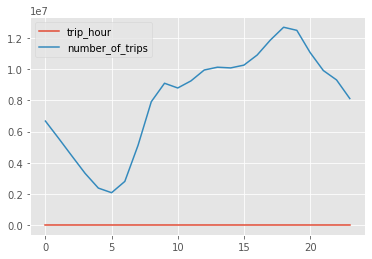

In [87]:
chicago_taxi_trips.plot_the_data(time_of_day)